## Multilayer perceptron neural networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import numpy.random as rd

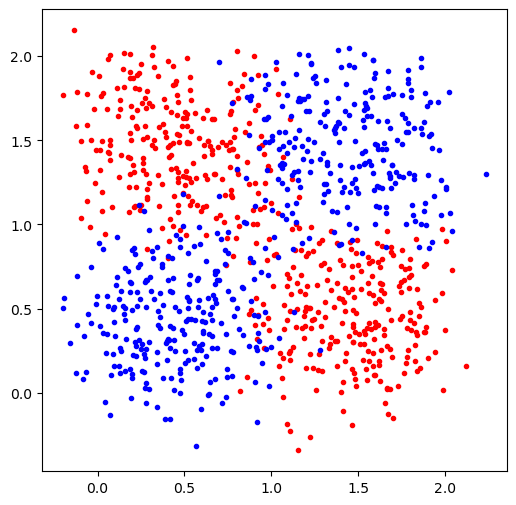

In [2]:
with open('xorData.p', 'rb') as f:
    pickle1 = pickle.load(f)
    
data=pickle1['data']
target=pickle1['target']

#plot data target as red and other blue
plt.figure(figsize=(6,6))
plt.plot(data[0,target>0],data[1,target>0],'.r')
plt.plot(data[0,target<1],data[1,target<1],'.b')

X=data
y=target
y=[-1 if x==0 else x for x in y] #chage all 0 to -1 
y=np.array(y)

In [3]:
H=1 #one hiden unit
Wi=rd.randn(2,H)*.1
b=np.zeros((H,1))
Wo=rd.randn(H,1)*.1
bo=0

dzWi=np.zeros(Wi.shape)
dzb=np.zeros(b.shape)
dzWo=np.zeros(Wo.shape)
dzbo=0

alpha=0.9 #moment term
iter=750 #iterations
eta=1e-4 #adaptation step

Error=np.zeros(iter)

for n in range(iter):
    #forward pass
    u=np.dot(Wi.T,X)+b
    v=np.tanh(u)
    z=np.dot(Wo.T,v)+bo
    yh=np.tanh(z)
    
    #error 
    E=y-yh
    Error[n]=np.mean(E**2)
    
    #gradient
    dz=-2*E*(1-yh**2)
    dbo=np.sum(dz)
    dWo=np.dot(v,dz.T)
    du=(1-v**2)*np.dot(Wo,dz)
    db=np.sum(du,axis=1)
    dWi=np.dot(X,du.T)
    
    #adapt
    dzWi=alpha*dzWi+dWi
    dzb=alpha*dzb+db[:,np.newaxis]
    dzWo=alpha*dzWo+dWo
    dzbo=alpha*dzbo+dbo
    
    Wi=Wi-eta*dzWi
    b=b-eta*dzb
    Wo=Wo-eta*dzWo

    bo=bo-eta*dzbo

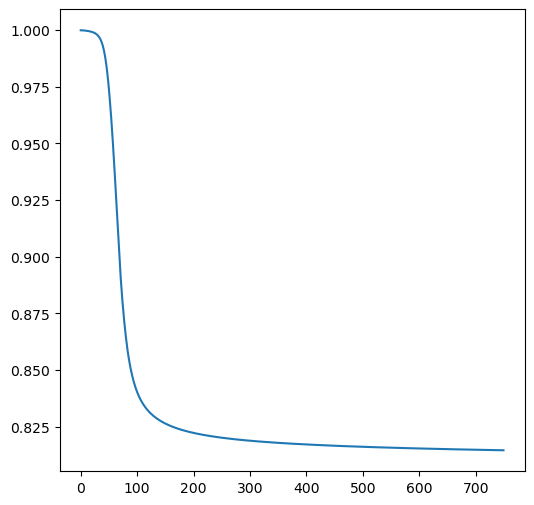

In [4]:
plt.figure(figsize=(6,6))
plt.plot(Error)

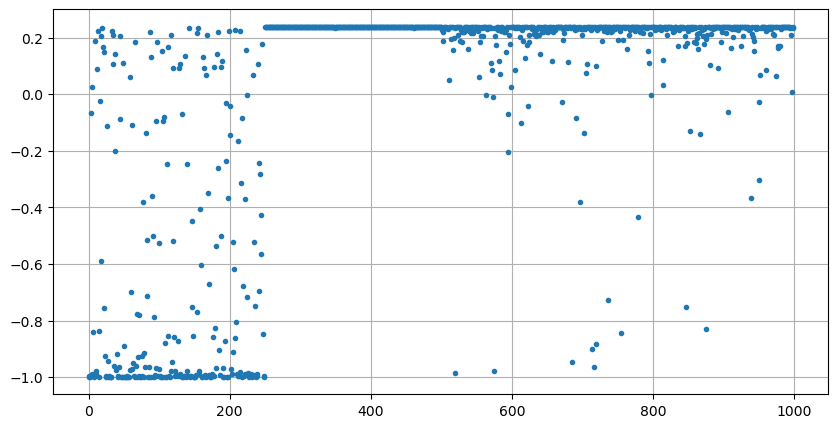

In [5]:
plt.figure(figsize=(10,5))
plt.plot(yh.squeeze(),'.')
plt.grid(True)

Number of erros: 323


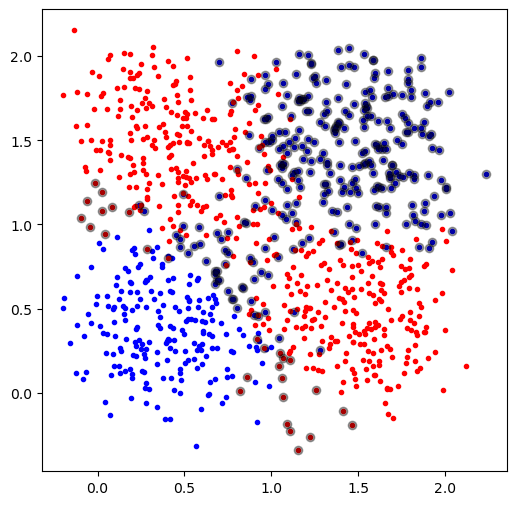

In [6]:
plt.figure(figsize=(6,6))
ye=(yh.squeeze()>=0)*2-1
plt.plot(X[0,y==-1],X[1,y==-1],'.b')
plt.plot(X[0,y==1],X[1,y==1],'.r')
plt.plot(X[0,y!=ye],X[1,y!=ye],'ok',alpha=.35)
print('Number of erros:',np.sum(y!=ye))

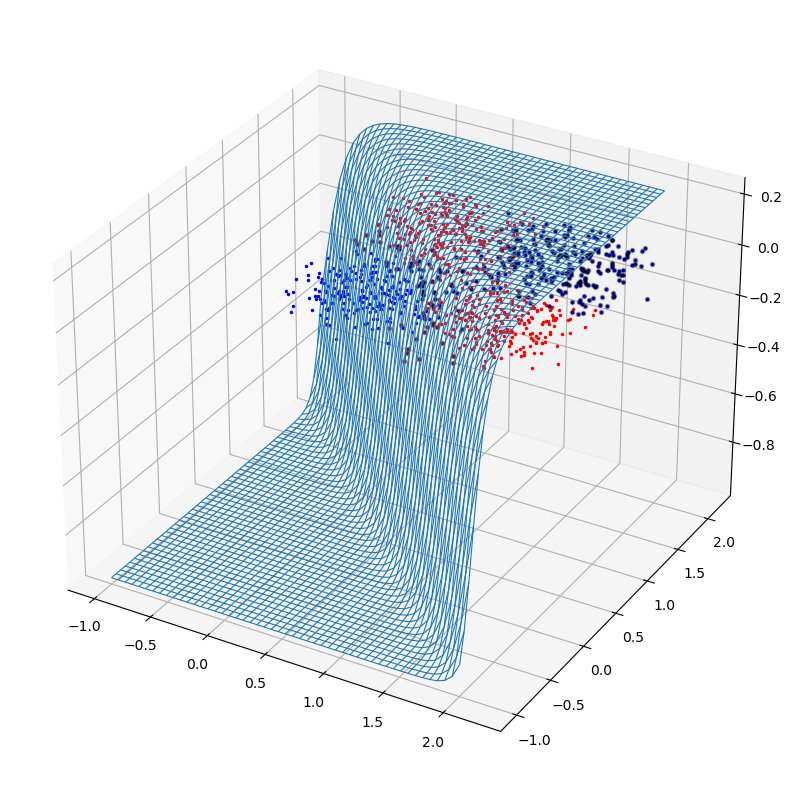

In [14]:
gX,gY=np.meshgrid(np.linspace(-1,2,50),np.linspace(-1,2,50))
X2=np.vstack((gX.ravel(),gY.ravel()))
u=np.dot(Wi.T,X2)+b
v=np.tanh(u)
z=np.dot(Wo.T,v)
yh=np.tanh(z+bo)
Yh=np.reshape(yh,(50,50))

#For look around view:
#%matplotlib notebook
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d  

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
#ax.contour3D(gX,gY,Yh,50,cmap='binary',linewidth=0.5)
ax.plot_wireframe(gX,gY,Yh,linewidth=0.8)

ax.plot(X[0,y==-1],X[1,y==-1],'.b', markersize=3)
ax.plot(X[0,y==1],X[1,y==1],'.r', markersize=3)
ax.plot(X[0,y!=ye],X[1,y!=ye],'ok',alpha=.3, markersize=3)

#%matplotlib

Because there is only one hidden unit we can't expect great result with given data. (One quarter will always be classified wrong.)

Number of erros: 87


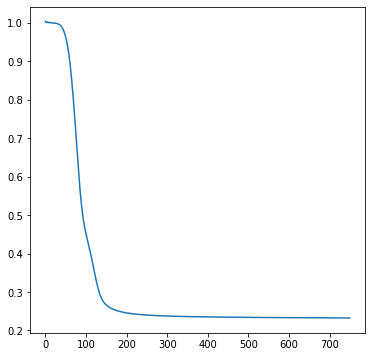

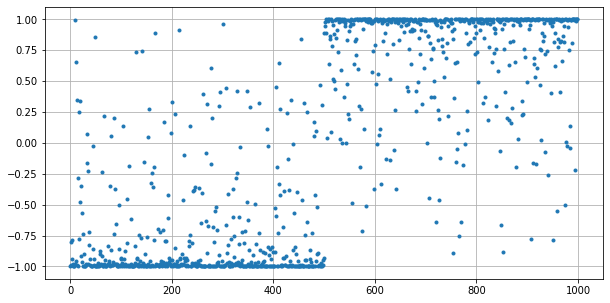

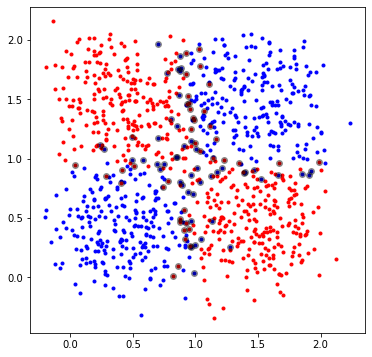

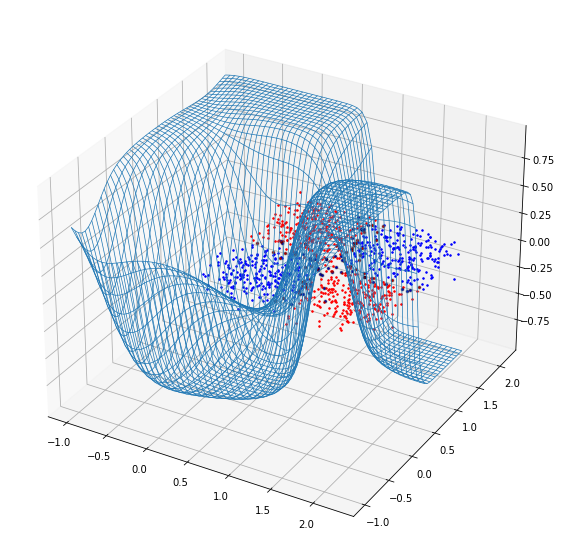

In [8]:
H=10 #10 hidden units
Wi=rd.randn(2,H)*.1
b=np.zeros((H,1))
Wo=rd.randn(H,1)*.1
bo=0

dzWi=np.zeros(Wi.shape)
dzb=np.zeros(b.shape)
dzWo=np.zeros(Wo.shape)
dzbo=0

alpha=0.9 #moment term
iter=750 #iterations
eta=1e-4 #adaptation step

Error=np.zeros(iter)

for n in range(iter):
    #forward pass
    u=np.dot(Wi.T,X)+b
    v=np.tanh(u)
    z=np.dot(Wo.T,v)+bo
    yh=np.tanh(z)
    
    #error 
    E=y-yh
    Error[n]=np.mean(E**2)
    
    #gradient
    dz=-2*E*(1-yh**2)
    dbo=np.sum(dz)
    dWo=np.dot(v,dz.T)
    du=(1-v**2)*np.dot(Wo,dz)
    db=np.sum(du,axis=1)
    dWi=np.dot(X,du.T)
    
    #adapt
    dzWi=alpha*dzWi+dWi
    dzb=alpha*dzb+db[:,np.newaxis]
    dzWo=alpha*dzWo+dWo
    dzbo=alpha*dzbo+dbo
    
    Wi=Wi-eta*dzWi
    b=b-eta*dzb
    Wo=Wo-eta*dzWo

    bo=bo-eta*dzbo
    
    
plt.figure(figsize=(6,6))
plt.plot(Error)

plt.figure(figsize=(10,5))
plt.plot(yh.squeeze(),'.')
plt.grid(True)

plt.figure(figsize=(6,6))
ye=(yh.squeeze()>=0)*2-1
plt.plot(X[0,y==-1],X[1,y==-1],'.b')
plt.plot(X[0,y==1],X[1,y==1],'.r')
plt.plot(X[0,y!=ye],X[1,y!=ye],'ok',alpha=.35)
print('Number of erros:',np.sum(y!=ye))

gX,gY=np.meshgrid(np.linspace(-1,2,50),np.linspace(-1,2,50))
X2=np.vstack((gX.ravel(),gY.ravel()))
u=np.dot(Wi.T,X2)+b
v=np.tanh(u)
z=np.dot(Wo.T,v)
yh=np.tanh(z+bo)
Yh=np.reshape(yh,(50,50))

#3DView:
#%matplotlib notebook
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d  

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
#ax.contour3D(gX,gY,Yh,50,cmap='binary',linewidth=0.5)
ax.plot_wireframe(gX,gY,Yh,linewidth=0.7)

ax.plot(X[0,y==-1],X[1,y==-1],'.b', markersize=3)
ax.plot(X[0,y==1],X[1,y==1],'.r', markersize=3)
ax.plot(X[0,y!=ye],X[1,y!=ye],'ok',alpha=.3, markersize=3)

#%matplotlib

Because we have more than one hidden units we can classify our date quite well. We got wrong classified points only in areas where they are mixed.

Number of erros: 88


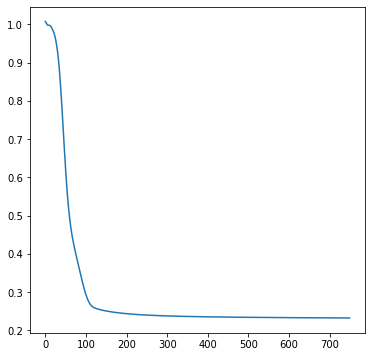

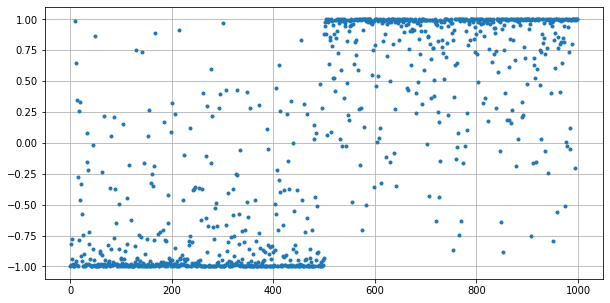

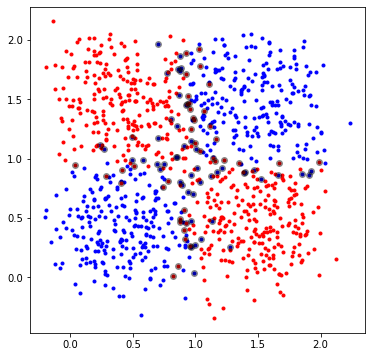

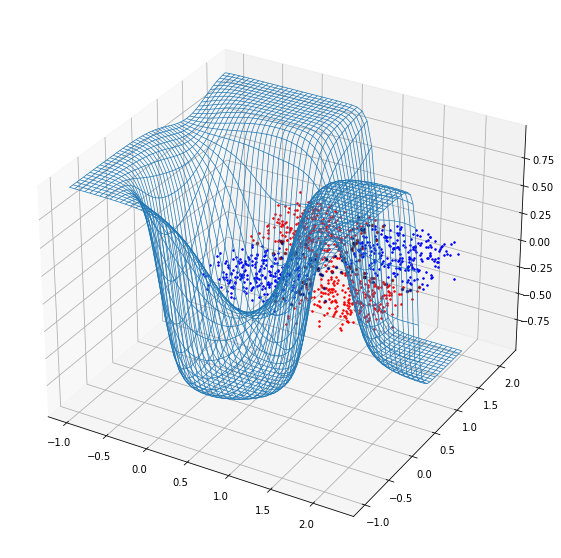

In [9]:
H=50 #50 hidden units
Wi=rd.randn(2,H)*.1
b=np.zeros((H,1))
Wo=rd.randn(H,1)*.1
bo=0

dzWi=np.zeros(Wi.shape)
dzb=np.zeros(b.shape)
dzWo=np.zeros(Wo.shape)
dzbo=0

alpha=0.9 #moment term
iter=750 #iterations
eta=1e-4 #adaptation step

Error=np.zeros(iter)

for n in range(iter):
    #forward pass
    u=np.dot(Wi.T,X)+b
    v=np.tanh(u)
    z=np.dot(Wo.T,v)+bo
    yh=np.tanh(z)
    
    #error 
    E=y-yh
    Error[n]=np.mean(E**2)
    
    #gradient
    dz=-2*E*(1-yh**2)
    dbo=np.sum(dz)
    dWo=np.dot(v,dz.T)
    du=(1-v**2)*np.dot(Wo,dz)
    db=np.sum(du,axis=1)
    dWi=np.dot(X,du.T)
    
    #adapt
    dzWi=alpha*dzWi+dWi
    dzb=alpha*dzb+db[:,np.newaxis]
    dzWo=alpha*dzWo+dWo
    dzbo=alpha*dzbo+dbo
    
    Wi=Wi-eta*dzWi
    b=b-eta*dzb
    Wo=Wo-eta*dzWo

    bo=bo-eta*dzbo
    
    
plt.figure(figsize=(6,6))
plt.plot(Error)

plt.figure(figsize=(10,5))
plt.plot(yh.squeeze(),'.')
plt.grid(True)

plt.figure(figsize=(6,6))
ye=(yh.squeeze()>=0)*2-1
plt.plot(X[0,y==-1],X[1,y==-1],'.b')
plt.plot(X[0,y==1],X[1,y==1],'.r')
plt.plot(X[0,y!=ye],X[1,y!=ye],'ok',alpha=.35)
print('Number of erros:',np.sum(y!=ye))

gX,gY=np.meshgrid(np.linspace(-1,2,50),np.linspace(-1,2,50))
X2=np.vstack((gX.ravel(),gY.ravel()))
u=np.dot(Wi.T,X2)+b
v=np.tanh(u)
z=np.dot(Wo.T,v)
yh=np.tanh(z+bo)
Yh=np.reshape(yh,(50,50))

#3DView:
#%matplotlib notebook
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d  

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
#ax.contour3D(gX,gY,Yh,50,cmap='binary',linewidth=0.5)
ax.plot_wireframe(gX,gY,Yh,linewidth=0.7)

ax.plot(X[0,y==-1],X[1,y==-1],'.b', markersize=3)
ax.plot(X[0,y==1],X[1,y==1],'.r', markersize=3)
ax.plot(X[0,y!=ye],X[1,y!=ye],'ok',alpha=.3, markersize=3)

#%matplotlib

No improvement with more hidden layers as our data dose not require more than 4 hidden layers to get good classification. Only improvement is shown in graph of errors as we need less iteration.

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.datasets as DT
import numpy.random as rd
import tensorflow.keras as keras
from sklearn.metrics import confusion_matrix, roc_curve
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping

cifar10=keras.datasets.cifar10
(X1,y1),(X2,y2)=cifar10.load_data()

#We obtained better results with three color channels.
#X1 = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X1])
#X2 = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X2])

#Prepare data
X1=X1.reshape((50000,32*32*3))*1.
X2=X2.reshape((10000,32*32*3))*1.
Y1=keras.utils.to_categorical(y1)
Y2=keras.utils.to_categorical(y2)
print(X1.shape,X2.shape,Y1.shape,Y2.shape)

(50000, 3072) (10000, 3072) (50000, 10) (10000, 10)


In [11]:
#build the MLP
mlp=keras.Sequential()
mlp.add(keras.layers.Dense(100,activation='relu',input_shape=(32*32*3,)))
mlp.add(keras.layers.Dense(100,activation='relu'))
mlp.add(keras.layers.Dense(100,activation='relu'))
mlp.add(keras.layers.Dense(100,activation='relu'))
mlp.add(keras.layers.Dense(100,activation='relu'))
mlp.add(keras.layers.Dense(100,activation='relu'))
mlp.add(keras.layers.Dense(100,activation='relu'))
mlp.add(keras.layers.Dense(100,activation='relu'))
mlp.add(keras.layers.Dense(100,activation='relu'))
mlp.add(keras.layers.Dense(100,activation='relu'))
mlp.add(keras.layers.Dense(10,activation='softmax'))
print(mlp.summary())

#compile the network
mlp.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               307300    
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               1

In [12]:
train=mlp.fit(X1,Y1,epochs=100,batch_size=10000,validation_data=(X2,Y2))

Epoch 1/100
5/5 [==============================] - 4s 322ms/step - loss: 12.9338 - accuracy: 0.1000 - val_loss: 11.0027 - val_accuracy: 0.1000
Epoch 2/100
5/5 [==============================] - 1s 209ms/step - loss: 10.1906 - accuracy: 0.0969 - val_loss: 11.3148 - val_accuracy: 0.0941
Epoch 3/100
5/5 [==============================] - 1s 215ms/step - loss: 6.0696 - accuracy: 0.0960 - val_loss: 3.6504 - val_accuracy: 0.0758
Epoch 4/100
5/5 [==============================] - 1s 224ms/step - loss: 3.6106 - accuracy: 0.0982 - val_loss: 2.8518 - val_accuracy: 0.1071
Epoch 5/100
5/5 [==============================] - 1s 206ms/step - loss: 2.6123 - accuracy: 0.0936 - val_loss: 2.3252 - val_accuracy: 0.1140
Epoch 6/100
5/5 [==============================] - 1s 219ms/step - loss: 2.3086 - accuracy: 0.1298 - val_loss: 2.3062 - val_accuracy: 0.1380
Epoch 7/100
5/5 [==============================] - 1s 221ms/step - loss: 2.2801 - accuracy: 0.1460 - val_loss: 2.2860 - val_accuracy: 0.1649
Epoch 8/1

[[205   8 173  22  29  38  39 135 265  86]
 [ 14 243  42  41  20  60  74  90 122 294]
 [ 29   9 314  14 118  92 218 114  70  22]
 [  5  21 138  97  62 213 263 120  36  45]
 [ 17   9 205  19 259  58 232 148  35  18]
 [  1   9 136  56  74 370 200 109  30  15]
 [  3  12 125  20 105  64 581  61   9  20]
 [ 10  14  95  21 134  92  84 482  17  51]
 [ 50  38  42  22  26  61  21  68 491 181]
 [ 24  64  21  24  15  40  82 143  86 501]]
Score: 35.43
Number of erros: 6457


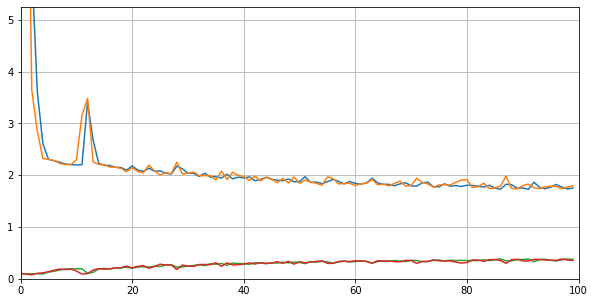

In [13]:
h=train.history
plt.figure(figsize=(10,5))
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.grid(True)
plt.axis([0,100,0,5.25])

Y2e=mlp.predict(X2)
y2e=np.argmax(Y2e,axis=1)
y2=(np.transpose(y2)).reshape(10000,)
y2=np.int64(y2)
print(confusion_matrix(y2,y2e))
print('Score:',np.sum(y2==y2e)/y2.shape[0]*100)
print('Number of erros:', np.sum(y2!=y2e))

Pre-processing with PCA:

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers

cifar10=keras.datasets.cifar10
(X1,y1),(X2,y2)=cifar10.load_data()

X1=X1.reshape((50000,32*32*3))*1.
X2=X2.reshape((10000,32*32*3))*1.
Y1=keras.utils.to_categorical(y1)
Y2=keras.utils.to_categorical(y2)

nCP=100
pca=PCA(n_components=nCP,whiten=True).fit(X1)
X1p=pca.transform(X1)
X2p=pca.transform(X2)

print(X1p.shape)

(50000, 100)


In [15]:
#build the MLP
mlp=keras.Sequential()
mlp.add(keras.layers.Dense(100,activation='tanh',input_shape=(nCP,)))
mlp.add(keras.layers.Dropout(.3)) #Dropout helps prevent overfitting 
mlp.add(keras.layers.Dense(100,activation='tanh'))
mlp.add(keras.layers.Dropout(.3))
mlp.add(keras.layers.Dense(100,activation='tanh'))
mlp.add(keras.layers.Dropout(.3))
mlp.add(keras.layers.Dense(100,activation='tanh'))
mlp.add(keras.layers.Flatten())
mlp.add(keras.layers.Dense(100,activation='tanh'))
mlp.add(keras.layers.Dense(10,activation='softmax'))

print(mlp.summary())

#compile the network
mlp.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['accuracy'])
train=mlp.fit(X1p,Y1,epochs=100,batch_size=1000,validation_data=(X2p,Y2))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 100)               10100     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               10100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_14 (Dense)            (None, 100)              

[[564  34  66  34  19  15  28  31 156  53]
 [ 34 671  21  19  10  15  24  17  56 133]
 [ 78  35 381  83 130  66 142  45  24  16]
 [ 22  22  88 353  60 167 169  45  36  38]
 [ 39  11 138  62 442  42 162  69  26   9]
 [ 14  15  76 190  73 366 149  64  32  21]
 [  5  15  63  54 112  34 677  16  11  13]
 [ 40  15  48  61 103  75  44 543  24  47]
 [ 76  61  14  28  28  18  16  10 688  61]
 [ 47 204   9  32  13  11  29  32  86 537]]
Score: 52.22
Number of erros: 4778


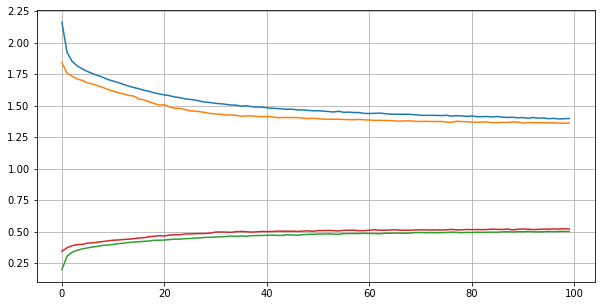

In [16]:
h=train.history
plt.figure(figsize=(10,5))
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.grid(True)

Y2e=mlp.predict(X2p)
y2e=np.argmax(Y2e,axis=1)
y2=(np.transpose(y2)).reshape(10000,)
y2=np.int64(y2)
print(confusion_matrix(y2,y2e))
print('Score:',np.sum(y2==y2e)/y2.shape[0]*100)
print('Number of erros:', np.sum(y2!=y2e))

Pre-processing with StandardScaler:

In [17]:
cifar10=keras.datasets.cifar10
(X1,y1),(X2,y2)=cifar10.load_data()

X1=X1.reshape((50000,32*32*3))*1.
X2=X2.reshape((10000,32*32*3))*1.
Y1=keras.utils.to_categorical(y1)
Y2=keras.utils.to_categorical(y2)
print(X1.shape,X2.shape,Y1.shape,Y2.shape)

sc=StandardScaler().fit(X1)
X1=sc.transform(X1)
X2=sc.transform(X2)

(50000, 3072) (10000, 3072) (50000, 10) (10000, 10)


In [18]:
#build the MLP
mlp=keras.Sequential()
mlp.add(keras.layers.Dense(100,activation='relu',input_shape=(32*32*3,)))
mlp.add(keras.layers.Dropout(.3))
mlp.add(keras.layers.Dense(100,activation='relu'))
mlp.add(keras.layers.Dropout(.3))
mlp.add(keras.layers.Dense(100,activation='relu'))
mlp.add(keras.layers.Dropout(.3))
mlp.add(keras.layers.Dense(100,activation='relu'))
mlp.add(keras.layers.Dropout(.3))
mlp.add(keras.layers.Dense(100,activation='relu'))
mlp.add(keras.layers.Flatten())
mlp.add(keras.layers.Dense(100,activation='relu'))
mlp.add(keras.layers.Dense(10,activation='softmax'))

print(mlp.summary())


#compile the network
mlp.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['accuracy'])

train=mlp.fit(X1,Y1,epochs=100,batch_size=1000,validation_data=(X2,Y2))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 100)               307300    
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_18 (Dense)            (None, 100)               10100     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_19 (Dense)            (None, 100)               10100     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_20 (Dense)            (None, 100)              

[[596  30  65  18  43   5  18  23 157  45]
 [ 59 624  14  36   9   8  12  11  69 158]
 [ 79  22 340 113 203  56 102  56  15  14]
 [ 30  11  73 455  84 140 109  43  22  33]
 [ 47   9  93  88 544  31  91  60  22  15]
 [ 19   9  78 336  93 310  62  58  17  18]
 [ 12  13  54 133 130  19 602   9  12  16]
 [ 41   8  47  91 119  72  21 552   7  42]
 [118  62  14  43  28   5   7   7 673  43]
 [ 56 162   8  40  17   6  27  42  71 571]]
Score: 52.669999999999995
Number of erros: 4733


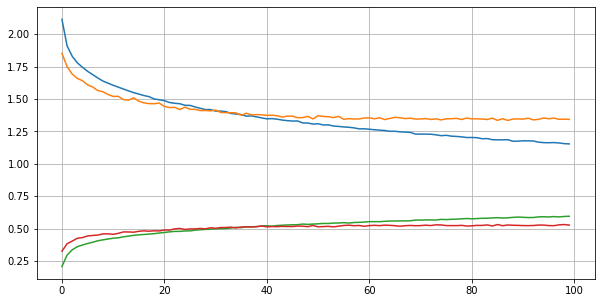

In [19]:
h=train.history
plt.figure(figsize=(10,5))
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.grid(True)

Y2e=mlp.predict(X2)
y2e=np.argmax(Y2e,axis=1)
y2=(np.transpose(y2)).reshape(10000,)
y2=np.int64(y2)
print(confusion_matrix(y2,y2e))
print('Score:',np.sum(y2==y2e)/y2.shape[0]*100)
print('Number of erros:', np.sum(y2!=y2e))

We trained different mlp networks we obtained most optimal classifier with less layers than 2.a) and using dropout to prevent overfitting. Best results we obtained with standardscaler preprocessing. 